In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
filepath='https://github.com/prabhupanda/ML-code/blob/master/propulsion.csv?raw=true'
data=pd.read_csv(filepath)

In [ ]:
data.head()

,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


In [ ]:
data['GT Compressor inlet air temperature (T1) [C]'].nunique()

1

In [ ]:
#findout number of missing values in each column
data.isnull().sum(axis=0)

Unnamed: 0                                       0
Lever position (lp) [ ]                          0
Ship speed (v) [knots]                           0
Gas Turbine shaft torque (GTT) [kN m]            0
Gas Turbine rate of revolutions (GTn) [rpm]      0
Gas Generator rate of revolutions (GGn) [rpm]    0
Starboard Propeller Torque (Ts) [kN]             0
Port Propeller Torque (Tp) [kN]                  0
HP Turbine exit temperature (T48) [C]            0
GT Compressor inlet air temperature (T1) [C]     0
GT Compressor outlet air temperature (T2) [C]    0
HP Turbine exit pressure (P48) [bar]             0
GT Compressor inlet air pressure (P1) [bar]      0
GT Compressor outlet air pressure (P2) [bar]     0
Gas Turbine exhaust gas pressure (Pexh) [bar]    0
Turbine Injecton Control (TIC) [%]               0
Fuel flow (mf) [kg/s]                            0
GT Compressor decay state coefficient.           0
GT Turbine decay state coefficient.              0
dtype: int64

In [ ]:
#find out linear correlations between the features
#Using Pearson's Correlation
corr_matrix=data.corr(method='pearson')  
corr_matrix.fillna(value=0,inplace=True)

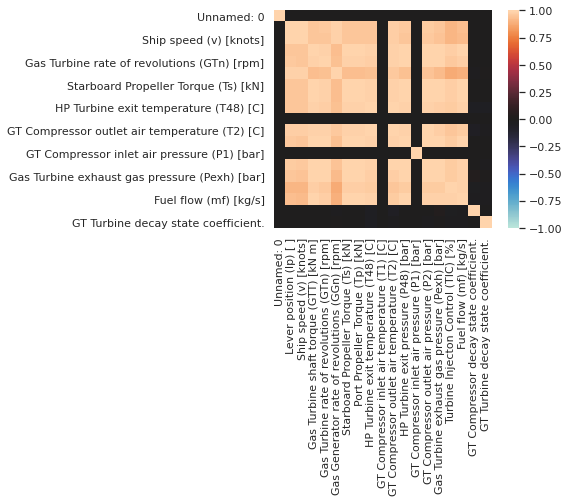

In [ ]:
#plotting the correaltion matrix in heatmap
sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=0,fmt='.1g',square=True,)

In [ ]:
corr_matrix.astype(np.float32).head()

,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
Unnamed: 0,1.000000,0.002340,0.002237,0.006241,0.006338,0.002081,0.005816,0.005816,0.006907,0.0,0.005475,0.006299,0.000000e+00,0.005952,0.006920,0.007610,0.007342,-0.001494,0.004072
Lever position (lp) [ ],0.002340,1.000000,0.999915,0.960911,0.961725,0.986055,0.959239,0.959239,0.960749,0.0,0.982576,0.962875,-4.781148e-14,0.968923,0.953182,0.912612,0.931016,-0.002070,-0.001045
Ship speed (v) [knots],0.002237,0.999915,1.000000,0.958136,0.960055,0.986651,0.956379,0.956379,0.958342,0.0,0.980985,0.960437,4.850010e-16,0.966792,0.950647,0.908985,0.927413,-0.002009,-0.001008
Gas Turbine shaft torque (GTT) [kN m],0.006241,0.960911,0.958136,1.000000,0.989663,0.933165,0.999170,0.999170,0.991094,0.0,0.990291,0.998888,-1.268565e-15,0.997574,0.996014,0.977424,0.995014,0.000736,-0.000533
Gas Turbine rate of revolutions (GTn) [rpm],0.006338,0.961725,0.960055,0.989663,1.000000,0.942944,0.988572,0.988572,0.979419,0.0,0.989157,0.995086,7.448827e-15,0.996008,0.994047,0.961876,0.980114,0.000156,-0.000677


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


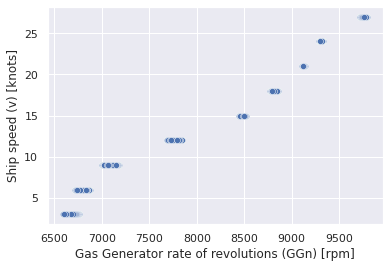

In [ ]:
sns.scatterplot(data['Gas Generator rate of revolutions (GGn) [rpm]'],data['Ship speed (v) [knots]'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


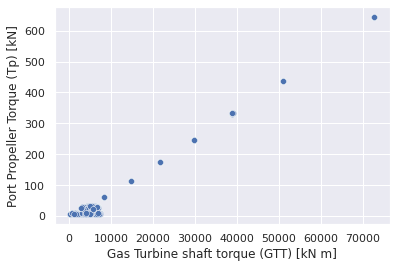

In [ ]:
sns.scatterplot(data['Gas Turbine shaft torque (GTT) [kN m]'],data['Port Propeller Torque (Tp) [kN]'])

In [ ]:
#SPLITTING THE DATA INTO TRANING & TEST SET (STRATIFIED SAMPLING NOT USED FOR SIMPLICITY)
from sklearn.model_selection import train_test_split
X=data.iloc[:,1:-2].values
y=data.iloc[:,-2:].values

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#SCALING & STANDARDISING THE INPUTS
from sklearn.preprocessing import StandardScaler
#standardising the inputs
x_scaler=StandardScaler()
x_train=x_scaler.fit_transform(x_train)
x_test=x_scaler.transform(x_test)

In [ ]:
#developing a Deep Learning ANN model
import tensorflow as tf
from tensorflow import keras

dl_model=keras.models.Sequential()
dl_model.add(keras.layers.Dense(64,activation='relu'))
dl_model.add(keras.layers.Dense(64,activation='relu'))
dl_model.add(keras.layers.Dense(32,activation='relu'))
dl_model.add(keras.layers.Dense(2,activation='sigmoid'))
#compiling the DL model
dl_model.compile(optimizer='adam',loss='mean_squared_error',metrics=[tf.keras.metrics.RootMeanSquaredError(),'accuracy'])
#training the model
history=dl_model.fit(x_train,y_train,epochs=100,validation_split=0.1,verbose=2)

Epoch 1/100
225/225 - 0s - loss: 0.0110 - root_mean_squared_error: 0.1048 - accuracy: 0.6994 - val_loss: 3.0698e-04 - val_root_mean_squared_error: 0.0175 - val_accuracy: 0.7437
Epoch 2/100
225/225 - 0s - loss: 2.7970e-04 - root_mean_squared_error: 0.0167 - accuracy: 0.7343 - val_loss: 2.7094e-04 - val_root_mean_squared_error: 0.0165 - val_accuracy: 0.7437
Epoch 3/100
225/225 - 0s - loss: 2.3657e-04 - root_mean_squared_error: 0.0154 - accuracy: 0.7343 - val_loss: 2.3106e-04 - val_root_mean_squared_error: 0.0152 - val_accuracy: 0.7437
Epoch 4/100
225/225 - 0s - loss: 2.0245e-04 - root_mean_squared_error: 0.0142 - accuracy: 0.7343 - val_loss: 1.8315e-04 - val_root_mean_squared_error: 0.0135 - val_accuracy: 0.7437
Epoch 5/100
225/225 - 0s - loss: 1.5830e-04 - root_mean_squared_error: 0.0126 - accuracy: 0.7343 - val_loss: 1.5134e-04 - val_root_mean_squared_error: 0.0123 - val_accuracy: 0.7437
Epoch 6/100
225/225 - 0s - loss: 1.3638e-04 - root_mean_squared_error: 0.0117 - accuracy: 0.7343 - 

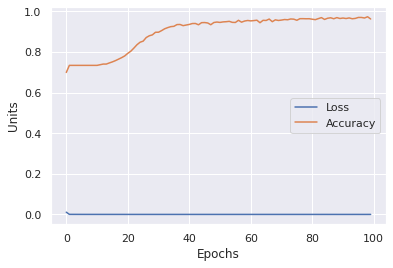

In [ ]:
#PLOTTING TRAINING ACCURACY VS LOSS
plt.plot(np.arange(0,100,1),history.history['loss'])
plt.plot(np.arange(0,100,1),history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Units')
plt.legend(['Loss','Accuracy'])
plt.show()

In [ ]:
#evaluating Model Performance on test set
loss,RMSE,accuracy=dl_model.evaluate(x_test,y_test)
print('Test Loss {}'.format(loss))
print('Test RMSE {}'.format(RMSE))
print('Test Accuracy {}'.format(accuracy))

63/63 [==============================] - 0s 1ms/step - loss: 1.9072e-06 - root_mean_squared_error: 0.0014 - accuracy: 0.9775
Test Loss 1.9071804899795097e-06
Test RMSE 0.0013810070231556892
Test Accuracy 0.9775000214576721


USING RANDOM FOREST REGRESSOR 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr_model=RandomForestRegressor(n_estimators=100)
rfr_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#sklearn library doesnt have RMSE so instead MSE is calculated and RMSE is derived from it
from sklearn.metrics import mean_squared_error
rfr_loss=mean_squared_error(y_test,rfr_model.predict(x_test))
print('Random Forest Regressor RMSE Loss {}'.format(np.sqrt(rfr_loss)))

Random Forest Regressor RMSE Loss 0.0011302832331704592


POLYNOMIAL REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

poly_regressor=LinearRegression()
poly_regressor.fit(x_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
poly_loss=mean_squared_error(y_test,poly_regressor.predict(x_test_poly))
print('Polynomial RMSE loss {}'.format(np.sqrt(poly_loss)))

Polynomial RMSE loss 1.2816378380601837e-05


In [ ]:
rfr_loss>poly_loss

True

DIMENSIONALITY REDUCTION

In [ ]:
#finding constant columns in the dataset

columns=data.columns.values
for i in columns:
    print('{0} has {1} unique values'.format(i,data[i].nunique()))

Unnamed: 0 has 10000 unique values
Lever position (lp) [ ] has 9 unique values
Ship speed (v) [knots] has 9 unique values
Gas Turbine shaft torque (GTT) [kN m] has 9634 unique values
Gas Turbine rate of revolutions (GTn) [rpm] has 3422 unique values
Gas Generator rate of revolutions (GGn) [rpm] has 9926 unique values
Starboard Propeller Torque (Ts) [kN] has 3880 unique values
Port Propeller Torque (Tp) [kN] has 3880 unique values
HP Turbine exit temperature (T48) [C] has 9890 unique values
GT Compressor inlet air temperature (T1) [C] has 1 unique values
GT Compressor outlet air temperature (T2) [C] has 9694 unique values
HP Turbine exit pressure (P48) [bar] has 523 unique values
GT Compressor inlet air pressure (P1) [bar] has 1 unique values
GT Compressor outlet air pressure (P2) [bar] has 4000 unique values
Gas Turbine exhaust gas pressure (Pexh) [bar] has 19 unique values
Turbine Injecton Control (TIC) [%] has 7403 unique values
Fuel flow (mf) [kg/s] has 694 unique values
GT Compress

In [ ]:
data.drop(columns=['GT Compressor inlet air temperature (T1) [C]','GT Compressor inlet air pressure (P1) [bar]'],inplace=True,)

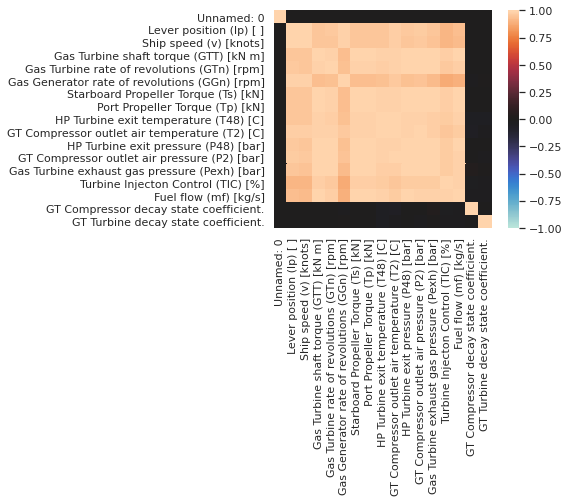

In [ ]:
sns.heatmap(data.corr(),vmin=-1,vmax=1,center=0,square=True)

In [ ]:
corr_matrix['Fuel flow (mf) [kg/s]'][2]

0.9274125311865465

In [ ]:
#FUNCION TO FINDOUT HIGHLY CORRELATED FEATURES
def corr_features(dataframe,alpha):
    corr_mat=dataframe.corr()
    column_values=dataframe.columns.tolist()
    corr_list=[]
    for i in column_values:
        for j in range(corr_mat.shape[0]):
            if corr_mat[i][j]>alpha:
                corr_list.append([i,column_values[j]])
            else:
                pass
        corr_mat.drop(labels=i,axis=0,inplace=True)
    return corr_list       

In [ ]:
matpot=corr_features(data,alpha=0.96)

In [ ]:
matpot

[['Unnamed: 0', 'Unnamed: 0'],
 ['Lever position (lp) [ ]', 'Unnamed: 0'],
 ['Lever position (lp) [ ]', 'Lever position (lp) [ ]'],
 ['Lever position (lp) [ ]', 'Ship speed (v) [knots]'],
 ['Lever position (lp) [ ]', 'Gas Turbine shaft torque (GTT) [kN m]'],
 ['Lever position (lp) [ ]', 'Gas Turbine rate of revolutions (GTn) [rpm]'],
 ['Lever position (lp) [ ]', 'Port Propeller Torque (Tp) [kN]'],
 ['Lever position (lp) [ ]', 'HP Turbine exit temperature (T48) [C]'],
 ['Lever position (lp) [ ]', 'GT Compressor outlet air temperature (T2) [C]'],
 ['Lever position (lp) [ ]', 'HP Turbine exit pressure (P48) [bar]'],
 ['Ship speed (v) [knots]', 'Unnamed: 0'],
 ['Ship speed (v) [knots]', 'Ship speed (v) [knots]'],
 ['Ship speed (v) [knots]', 'Gas Turbine shaft torque (GTT) [kN m]'],
 ['Ship speed (v) [knots]', 'Port Propeller Torque (Tp) [kN]'],
 ['Ship speed (v) [knots]', 'HP Turbine exit temperature (T48) [C]'],
 ['Ship speed (v) [knots]', 'GT Compressor outlet air temperature (T2) [C]'],

In [ ]:
corr_matrix=data.corr()
corr_matrix.shape

(17, 17)

In [ ]:
corr_matrix.columns

Index(['Unnamed: 0', 'Lever position (lp) [ ]', 'Ship speed (v) [knots]',
       'Gas Turbine shaft torque (GTT) [kN m]',
       'Gas Turbine rate of revolutions (GTn) [rpm]',
       'Gas Generator rate of revolutions (GGn) [rpm]',
       'Starboard Propeller Torque (Ts) [kN]',
       'Port Propeller Torque (Tp) [kN]',
       'HP Turbine exit temperature (T48) [C]',
       'GT Compressor outlet air temperature (T2) [C]',
       'HP Turbine exit pressure (P48) [bar]',
       'GT Compressor outlet air pressure (P2) [bar]',
       'Gas Turbine exhaust gas pressure (Pexh) [bar]',
       'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]',
       'GT Compressor decay state coefficient.',
       'GT Turbine decay state coefficient.'],
      dtype='object')

In [ ]:
corr_matrix.drop(labels=['Unnamed: 0'],axis=0,inplace=True)

In [ ]:
corr_matrix['Lever position (lp) [ ]'][1]

0.9999152488751933

In [ ]:
corr_matrix.head()

,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
Lever position (lp) [ ],0.002340,1.000000,0.999915,0.960911,0.961725,0.986055,0.959239,0.959239,0.960749,0.982576,0.962875,0.968923,0.953182,0.912612,0.931016,-0.002070,-0.001045
Ship speed (v) [knots],0.002237,0.999915,1.000000,0.958136,0.960055,0.986651,0.956379,0.956379,0.958342,0.980985,0.960437,0.966792,0.950647,0.908985,0.927413,-0.002009,-0.001008
Gas Turbine shaft torque (GTT) [kN m],0.006241,0.960911,0.958136,1.000000,0.989663,0.933165,0.999170,0.999170,0.991094,0.990291,0.998888,0.997574,0.996014,0.977424,0.995014,0.000736,-0.000533
Gas Turbine rate of revolutions (GTn) [rpm],0.006338,0.961725,0.960055,0.989663,1.000000,0.942944,0.988572,0.988572,0.979419,0.989157,0.995086,0.996008,0.994047,0.961876,0.980114,0.000156,-0.000677
Gas Generator rate of revolutions (GGn) [rpm],0.002081,0.986055,0.986651,0.933165,0.942944,1.000000,0.929888,0.929888,0.939507,0.966665,0.937563,0.946019,0.924375,0.878552,0.896886,-0.020852,0.008703


In [ ]:
copy=data.copy()
copy.head()

,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,780.304,4.523,22.879,1.050,90.435,1.790,0.973,0.978
1,1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,665.511,2.518,13.438,1.030,34.596,0.685,0.995,0.975
2,2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,580.587,1.392,7.566,1.020,12.477,0.247,0.980,0.978
3,3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,576.565,1.390,7.409,1.021,11.678,0.231,0.984,1.000
4,4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,663.682,2.518,13.374,1.031,34.154,0.676,0.998,0.980


In [ ]:
copy.drop(index=0,inplace=True)

In [ ]:
copy.head()

,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
1,1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,665.511,2.518,13.438,1.030,34.596,0.685,0.995,0.975
2,2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,580.587,1.392,7.566,1.020,12.477,0.247,0.980,0.978
3,3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,576.565,1.390,7.409,1.021,11.678,0.231,0.984,1.000
4,4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,663.682,2.518,13.374,1.031,34.154,0.676,0.998,0.980
5,5,7.148,21.0,38990.324,2678.068,9126.509,332.301,332.301,837.934,693.706,2.972,15.649,1.035,44.862,0.888,0.967,0.980
